In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns',999)
%matplotlib inline

In [3]:
dataset= pd.read_csv('data/Extended_Employee_Performance_and_Productivity_Data.csv')
dataset

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


In [5]:
dataset['Hire_Date'] = pd.to_datetime(dataset['Hire_Date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Employee_ID                  100000 non-null  int64         
 1   Department                   100000 non-null  object        
 2   Gender                       100000 non-null  object        
 3   Age                          100000 non-null  int64         
 4   Job_Title                    100000 non-null  object        
 5   Hire_Date                    100000 non-null  datetime64[ns]
 6   Years_At_Company             100000 non-null  int64         
 7   Education_Level              100000 non-null  object        
 8   Performance_Score            100000 non-null  int64         
 9   Monthly_Salary               100000 non-null  float64       
 10  Work_Hours_Per_Week          100000 non-null  int64         
 11  Projects_Handled           

In [6]:
dataset.describe()

,Employee_ID,Age,Hire_Date,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,2019-09-15 06:20:20.916036096,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
min,1.000000,22.000000,2014-09-07 08:03:05.556036,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2017-03-20 08:03:05.556036096,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,2019-09-21 08:03:05.556036096,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,2022-03-14 08:03:05.556036096,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,2024-09-03 08:03:05.556036,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000
std,28867.657797,11.244121,NaN,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719


In [10]:
dataset.select_dtypes('number').mean()-dataset.select_dtypes('number').median()

Employee_ID                     0.000000
Age                             0.029410
Years_At_Company                0.476070
Performance_Score              -0.004570
Monthly_Salary                -96.789000
Work_Hours_Per_Week            -0.043050
Projects_Handled                0.431170
Overtime_Hours                 -0.485070
Sick_Days                       0.008550
Remote_Work_Frequency           0.090500
Team_Size                       0.013560
Training_Hours                  0.506060
Promotions                     -0.000280
Employee_Satisfaction_Score    -0.000912
dtype: float64

## 1 - What is the most Hired Department in that Company ?
## 2 - Wish Department get more Salary?
## 3 - How mush Company Spending For each and All Department?

In [47]:
department_dataset=dataset.groupby(['Department']).agg(
    Frequency=('Department','count'),
    AvgSalary=('Monthly_Salary','mean'),
    Spending =('Monthly_Salary','sum')
).reset_index()
department_dataset.sort_values(by='Frequency',ascending=False)


,Department,Frequency,AvgSalary,Spending
6,Marketing,11216,6377.857525,71534050.0
2,Finance,11200,6398.575893,71664050.0
7,Operations,11181,6412.306592,71696000.0
4,IT,11131,6414.598868,71400900.0
8,Sales,11122,6413.154109,71327100.0
5,Legal,11118,6391.275409,71058200.0
0,Customer Support,11116,6403.881792,71185550.0
3,HR,10960,6400.355839,70147900.0
1,Engineering,10956,6417.246258,70307350.0


## 1 - What is the most Hired Department in that Company ?

### the answer is **Marketing**,**Finance** and **Operations**

C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_10208\1525440193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=department_dataset['Department'],y=department_dataset['Frequency'],palette=colors_palette)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

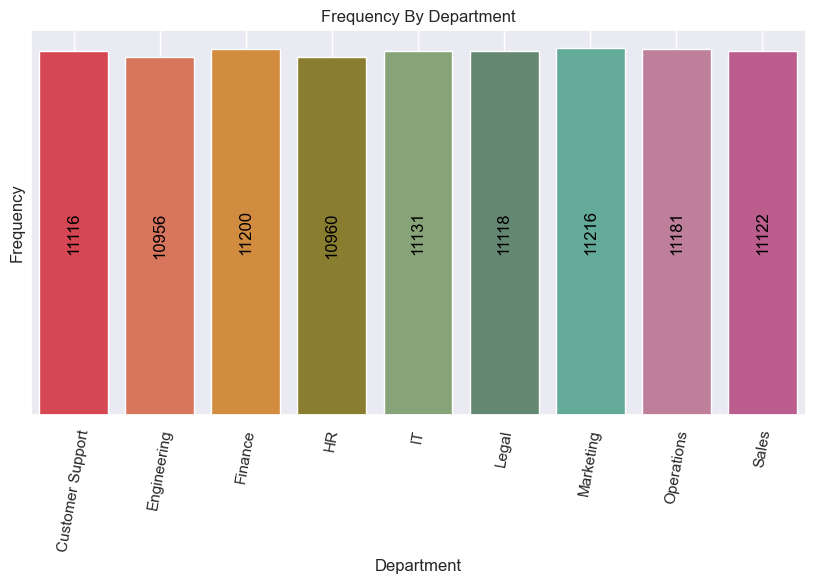

In [89]:
colors_palette=['#eb3040','#eb6949','#eb8d27','#988921','#85ab71','#5e8d6f','#58b69e','#c87499','#cb4d8e']

plt.figure(figsize=(10,5))

ax=sns.barplot(x=department_dataset['Department'],y=department_dataset['Frequency'],palette=colors_palette)
for container in ax.containers:
    ax.bar_label(container,label_type='center',rotation=90,color='black')

plt.xticks(rotation=80)
plt.title('Frequency By Department')
plt.yticks([])
ax.grid(True)

plt.show()



## 2 - Wish Department get more Salary?
### The answer is the same

C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_10208\606126412.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=department_dataset['Department'],y=department_dataset['AvgSalary'],palette=colors_palette)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

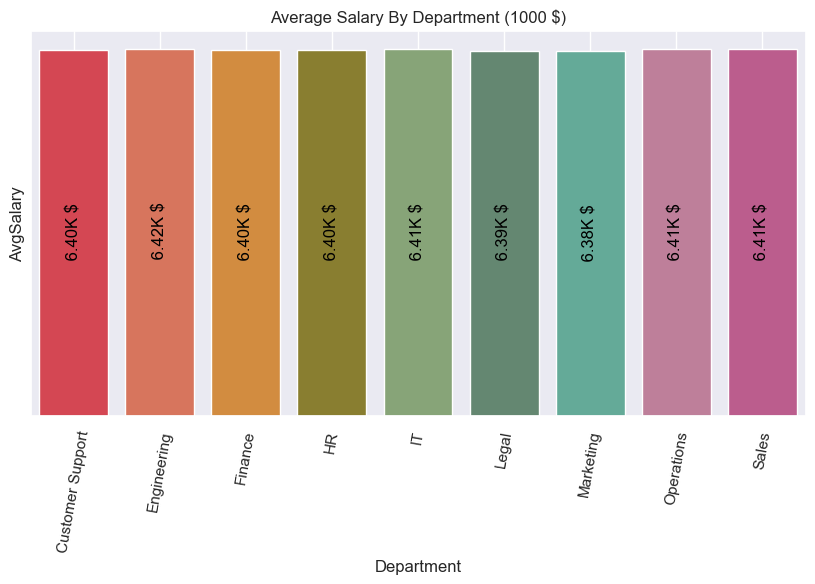

In [88]:
colors_palette=['#eb3040','#eb6949','#eb8d27','#988921','#85ab71','#5e8d6f','#58b69e','#c87499','#cb4d8e']
plt.figure(figsize=(10,5))
ax=sns.barplot(x=department_dataset['Department'],y=department_dataset['AvgSalary'],palette=colors_palette)
for container in ax.containers:
    label= [f"{val: .2f}K $" for val in container.datavalues/1000]
    ax.bar_label(container,labels=label,label_type='center',rotation=90,color='black')

plt.xticks(rotation=80)
plt.title('Average Salary By Department (1000 $)')
plt.yticks([])
ax.grid(True)

plt.show()


## 3 - How mush Company Spending For each and All Department?
### That Company Spending equaly for each Department, and for All its Spending 640M $ per Month

C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_10208\3640419435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=department_dataset['Department'],y=department_dataset['Spending'],palette=colors_palette)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

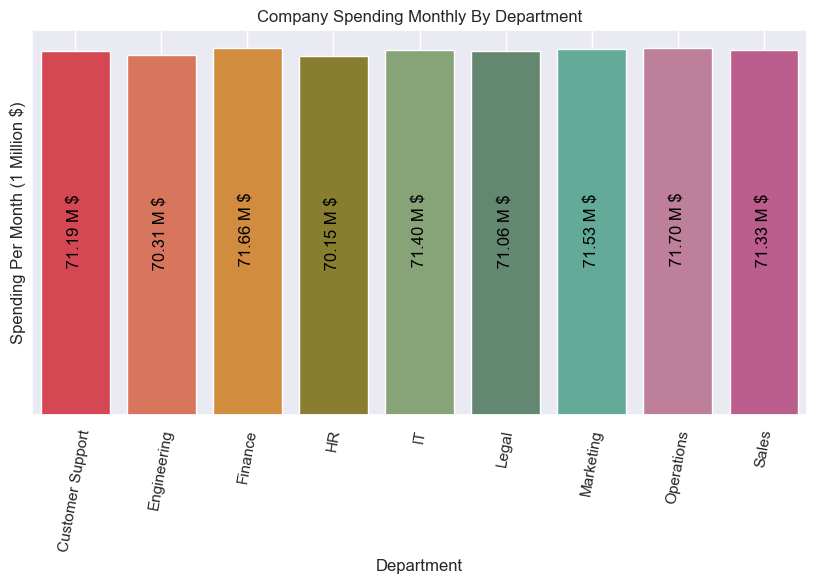

In [87]:
colors_palette=['#eb3040','#eb6949','#eb8d27','#988921','#85ab71','#5e8d6f','#58b69e','#c87499','#cb4d8e']
plt.figure(figsize=(10,5))
ax=sns.barplot(x=department_dataset['Department'],y=department_dataset['Spending'],palette=colors_palette)
for container in ax.containers:
    label= [f"{val: .2f} M $" for val in container.datavalues/1000000]
    ax.bar_label(container,labels=label,label_type='center',rotation=90,color='black')

plt.xticks(rotation=80)
plt.title('Company Spending Monthly By Department')
plt.ylabel('Spending Per Month (1 Million $)')
plt.yticks([])
ax.grid(True)

plt.show()

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1 - What are the most Hired Jobs in that Company ?
## 2 - Wish Job get more Salary?
## 3 - How mush Company Spending For each and All Jobs?

In [99]:
job_dataset= dataset.groupby('Job_Title').agg(
    Frequency=('Job_Title','count'),
    AvgSalary=('Monthly_Salary','mean'),
    Spending=('Monthly_Salary','sum'),
    AvgAge=('Age','mean')
).reset_index()
job_dataset.sort_values(by='Frequency',ascending=False)

,Job_Title,Frequency,AvgSalary,Spending,AvgAge
5,Specialist,14507,5855.335355,84943350.0,41.161715
4,Manager,14325,7798.324607,111711000.0,41.060593
6,Technician,14285,4545.148757,64927450.0,40.914316
0,Analyst,14261,5195.820770,74097600.0,40.991726
3,Engineer,14217,7799.324752,110883000.0,40.987691
1,Consultant,14210,7152.090077,101631200.0,41.063195
2,Developer,14195,6490.137372,92127500.0,41.024375


## 1 - What is the most Hired Jobs in that Company ?

### the answer is **Specialist**,**Manager** and **Technician**

C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_10208\837456666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=job_dataset['Job_Title'],y=job_dataset['Frequency'],palette=job_palette)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subse

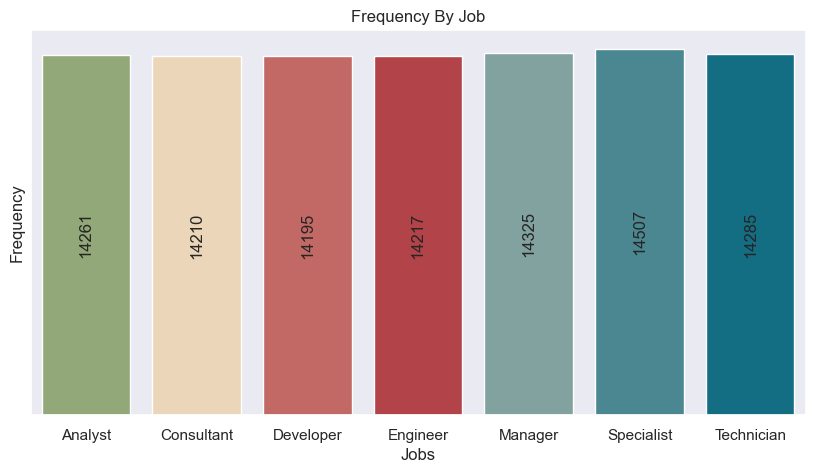

In [90]:
plt.figure(figsize=(10,5))
job_palette=['#93b071','#f5d7b0','#d15b56','#c43138','#7ba8a3','#3e909d','#007896']
ax= sns.barplot(x=job_dataset['Job_Title'],y=job_dataset['Frequency'],palette=job_palette)
for container in ax.containers:
    ax.bar_label(container,label_type='center',rotation=90)


plt.xlabel('Jobs')
plt.title('Frequency By Job')
plt.yticks([])
plt.show()

C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_10208\2839302827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=job_dataset['Job_Title'],y=job_dataset['AvgSalary'],palette=job_palette)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subs

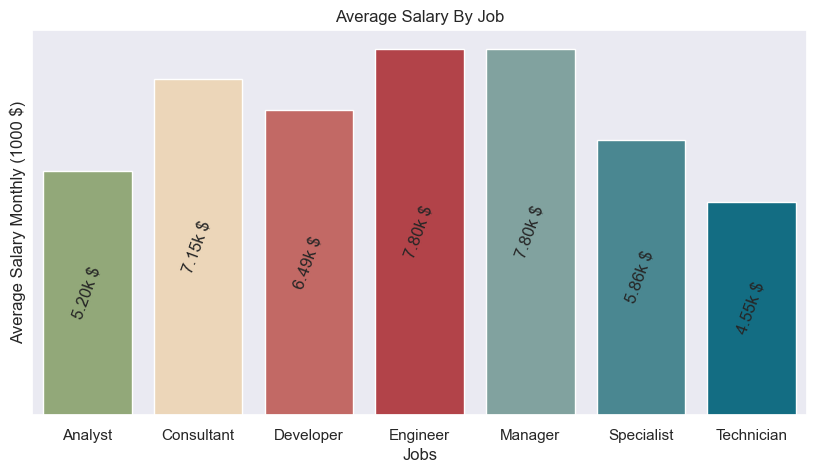

In [93]:
plt.figure(figsize=(10,5))
job_palette=['#93b071','#f5d7b0','#d15b56','#c43138','#7ba8a3','#3e909d','#007896']
ax= sns.barplot(x=job_dataset['Job_Title'],y=job_dataset['AvgSalary'],palette=job_palette)
for container in ax.containers:
    label= [f"{val:.2f}k $" for val in container.datavalues/1000]
    ax.bar_label(container,labels=label,label_type='center',rotation=70)


plt.xlabel('Jobs')
plt.ylabel('Average Salary Monthly (1000 $)')
plt.title('Average Salary By Job')
plt.yticks([])
plt.show()

C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_10208\2125580908.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=job_dataset['Job_Title'],y=job_dataset['Spending'],palette=job_palette)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subse

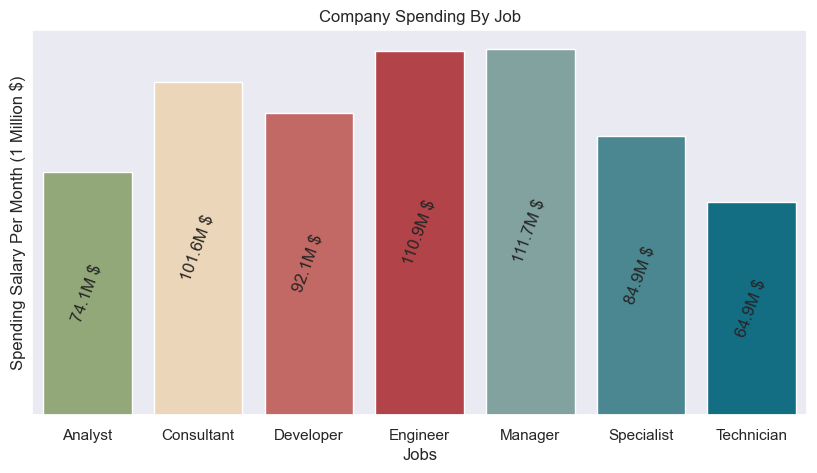

In [94]:
plt.figure(figsize=(10,5))
job_palette=['#93b071','#f5d7b0','#d15b56','#c43138','#7ba8a3','#3e909d','#007896']

ax= sns.barplot(x=job_dataset['Job_Title'],y=job_dataset['Spending'],palette=job_palette)
for container in ax.containers:
    label= [f"{val:.1f}M $" for val in container.datavalues/1000000]
    ax.bar_label(container,labels=label,label_type='center',rotation=70)


plt.xlabel('Jobs')
plt.ylabel('Spending Salary Per Month (1 Million $)')
plt.title('Company Spending By Job')
plt.yticks([])
plt.show()

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Good month to apply for a job in each department.
## for **Finance** : January (1) ,March (3) , 	October (10)
## for **Marketing** : July (7) , December (12)
## for **Marketing** : January (1) , March (3) , May (5) , July (7)

Text(0.5, 1.0, 'Hired Frequency by month')

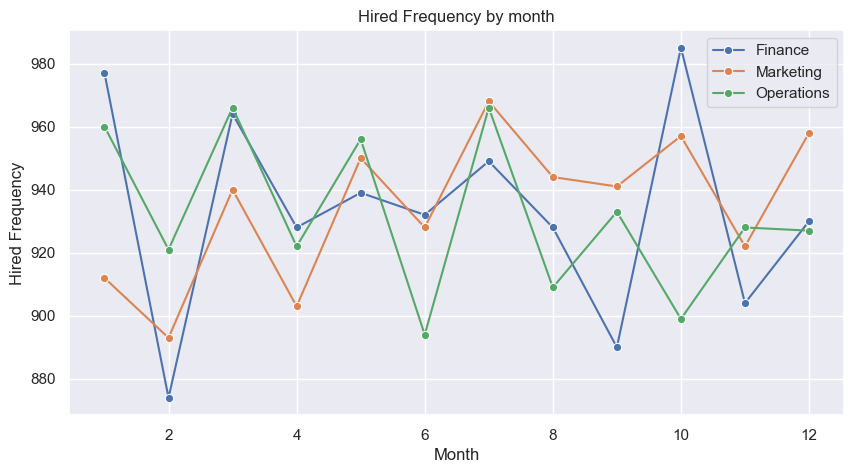

In [119]:
# most Hired Department ['Finance', 'Marketing', 'Operations']

plt.figure(figsize=(10,5))
most_hired_departement=['Finance', 'Marketing', 'Operations']
for Departement in most_hired_departement:
    df= dataset[ dataset['Department'] == Departement]
    df_hire_month= df.groupby(dataset['Hire_Date'].dt.month).size()

    sns.lineplot(x=df_hire_month.index,y=df_hire_month.values,label=Departement,marker='o')


plt.ylabel('Hired Frequency')
plt.xlabel('Month')

plt.title('Hired Frequency by month')

### Good month to apply for a job for each job name.


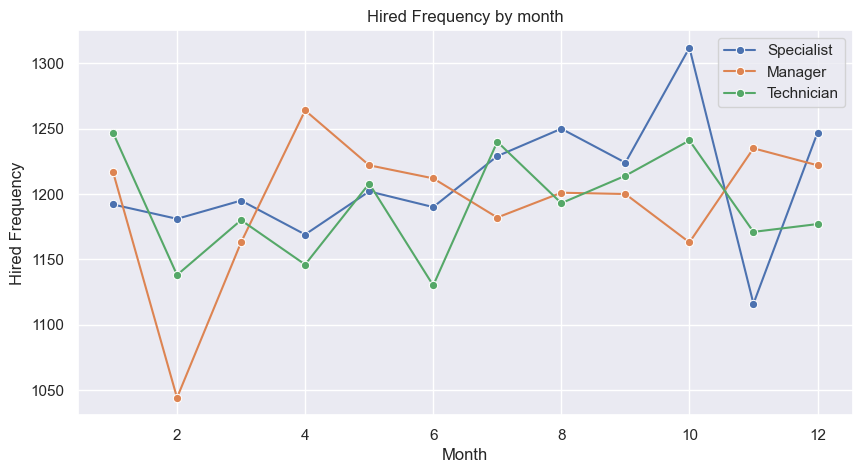

In [115]:
# most hired Jobs ['Specialist', 'Manager', 'Technician']
plt.figure(figsize=(10,5))
most_hired_jobs=['Specialist', 'Manager', 'Technician']

for job in most_hired_jobs:
    df= dataset[ dataset['Job_Title'] == job]
    df_hire_month= df.groupby(dataset['Hire_Date'].dt.month).size()

    sns.lineplot(x=df_hire_month.index,y=df_hire_month.values,label=job,marker='o')

plt.ylabel('Hired Frequency')
plt.xlabel('Month')

plt.title('Hired Frequency by month')
plt.show()
    

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Hired Frequency by month')

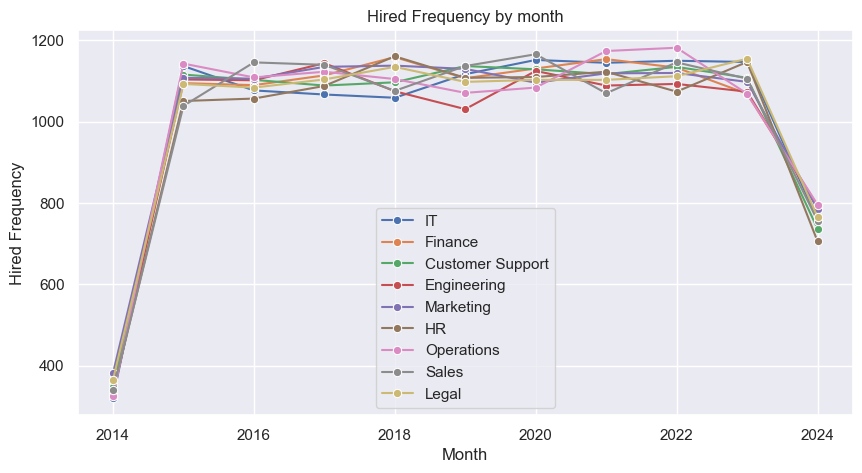

In [122]:
plt.figure(figsize=(10,5))
all_departement=dataset['Department'].unique()
for Departement in all_departement:
    df= dataset[ dataset['Department'] == Departement]
    df_hire_month= df.groupby(dataset['Hire_Date'].dt.year).size()

    sns.lineplot(x=df_hire_month.index,y=df_hire_month.values,label=Departement,marker='o')


plt.ylabel('Hired Frequency')
plt.xlabel('Month')

plt.title('Hired Frequency by month (All Department)')

Text(0.5, 1.0, 'Hired Frequency by month (most Hired)')

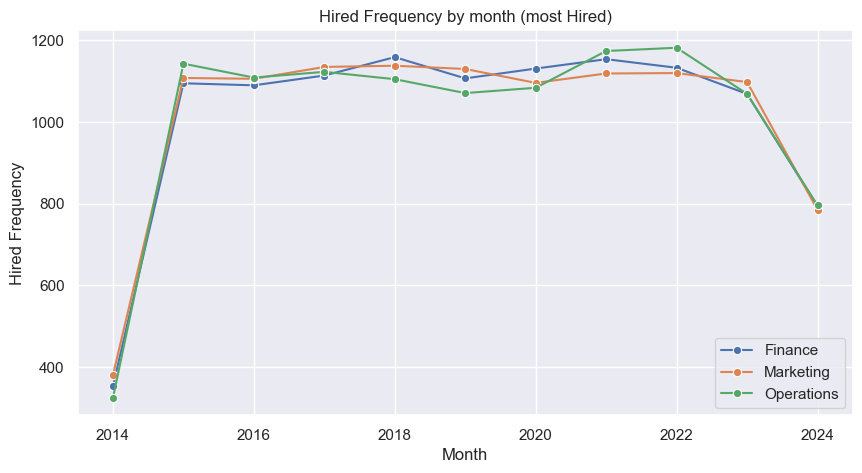

In [123]:
plt.figure(figsize=(10,5))
most_hired_departement=['Finance', 'Marketing', 'Operations']
for Departement in most_hired_departement:
    df= dataset[ dataset['Department'] == Departement]
    df_hire_month= df.groupby(dataset['Hire_Date'].dt.year).size()

    sns.lineplot(x=df_hire_month.index,y=df_hire_month.values,label=Departement,marker='o')


plt.ylabel('Hired Frequency')
plt.xlabel('Month')

plt.title('Hired Frequency by month (most Hired)' )

# **Why is hiring decreasing at that company last year?**

In [147]:
Resigned_dataset= dataset.groupby(['Resigned','Department']).agg(
    Frequency=('Resigned','count')
).reset_index()
Resigned_dataset

,Resigned,Department,Frequency
0,False,Customer Support,10018
1,False,Engineering,9899
2,False,Finance,10020
3,False,HR,9835
4,False,IT,10067
5,False,Legal,9982
6,False,Marketing,10091
7,False,Operations,10060
8,False,Sales,10018
9,True,Customer Support,1098


c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset =

Text(0.5, 1.0, 'Department Frequency By "Not Resigned" or "Resigned" employee')

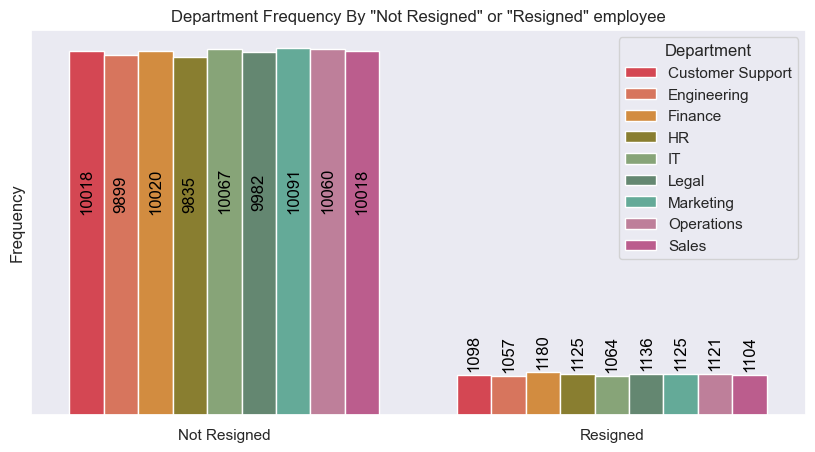

In [143]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=Resigned_dataset['Resigned'],y=Resigned_dataset['Frequency'],hue=Resigned_dataset['Department'],palette=colors_palette)
for container in ax.containers:
    ax.bar_label(container,label_type='center',rotation=90,padding=30,color='black')
ax.set_xticklabels(['Not Resigned','Resigned'])
plt.xlabel('')
plt.yticks([])
plt.title('Department Frequency By "Not Resigned" or "Resigned" employee')

### Classify Age of Employees to : [21-30 | 31-40 | 41-50 | 51-60]


In [150]:
def get_class(x):
    if x >=22 and x <31:
        return '21-30'
    elif x >=31 and x <41:
        return '31-40'
    elif x >=41 and x <51:
        return '41-50'
    elif x >=51 and x <61:
        return '51-60'
dataset['Age_class']= dataset['Age'].apply(lambda x : get_class(x))
dataset['Age_class'].value_counts()

Age_class
41-50    25721
51-60    25713
31-40    25535
21-30    23031
Name: count, dtype: int64

C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_10208\629133629.py:3: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  ax=sns.boxplot(x=dataset['Age_class'],y=dataset['Years_At_Company'],hue=dataset['Education_Level'],palette=colors_palette)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.p

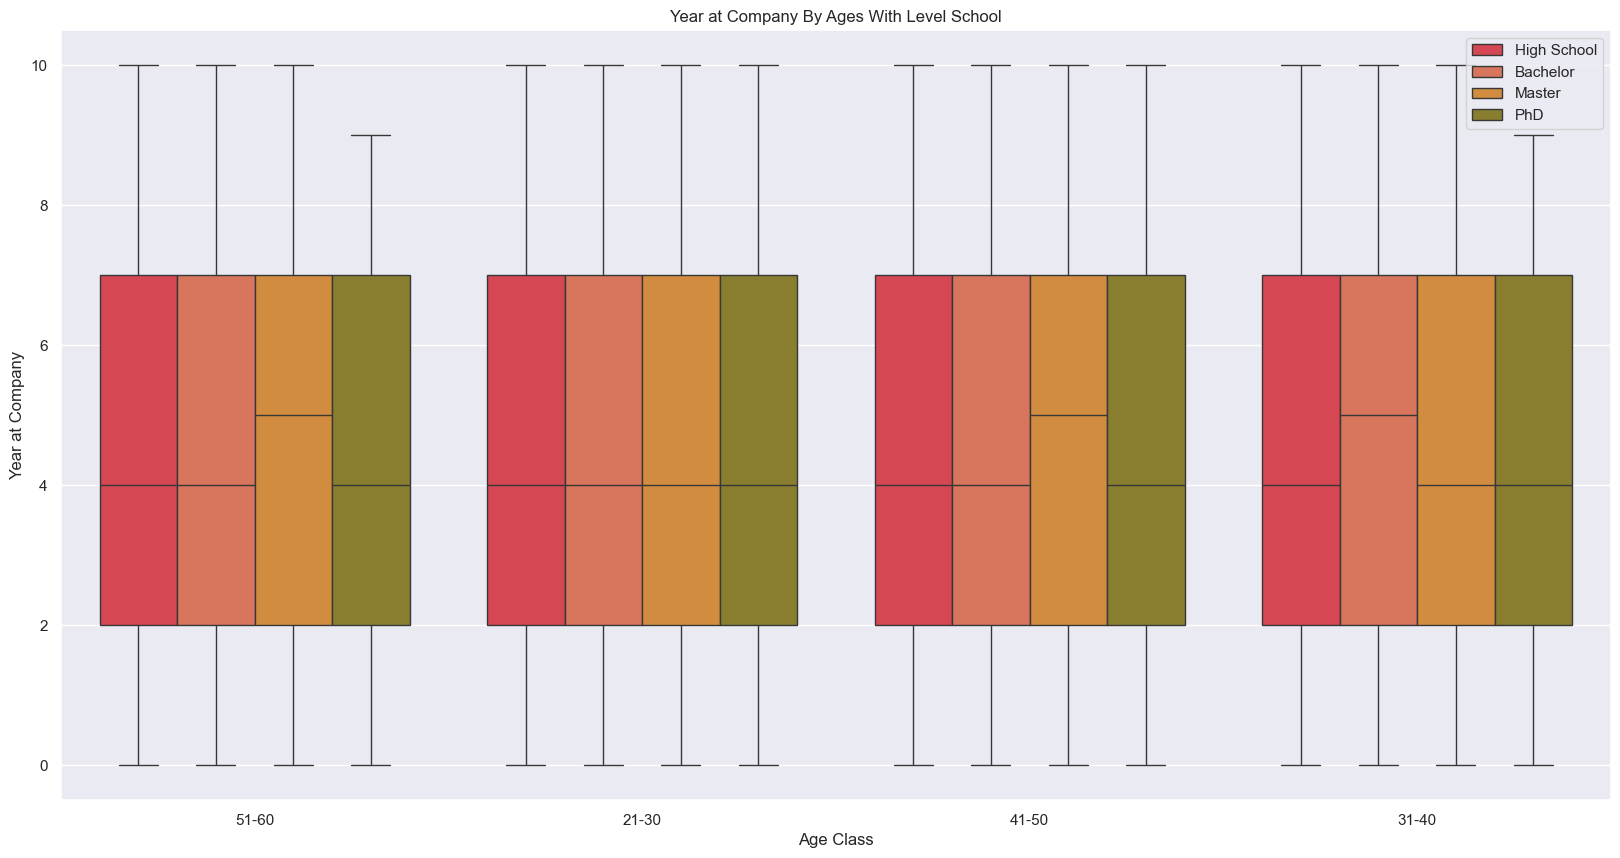

In [175]:
sns.set_theme()
plt.figure(figsize=(20,10))
ax=sns.boxplot(x=dataset['Age_class'],y=dataset['Years_At_Company'],hue=dataset['Education_Level'],palette=colors_palette)
ax.legend(loc='upper right',bbox_to_anchor=(1,1))

plt.xlabel('Age Class')
plt.ylabel('Year at Company')
plt.title('Year at Company By Ages With Level School')

plt.show()

C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_10208\2803529290.py:5: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  ax=sns.boxplot(x=dataset['Age_class'],y=dataset['Years_At_Company'],hue=dataset['Department'][dataset['Department'].isin(['Finance', 'Marketing', 'Operations'])],palette=job_palette)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Topland.ma\AppData\Loca

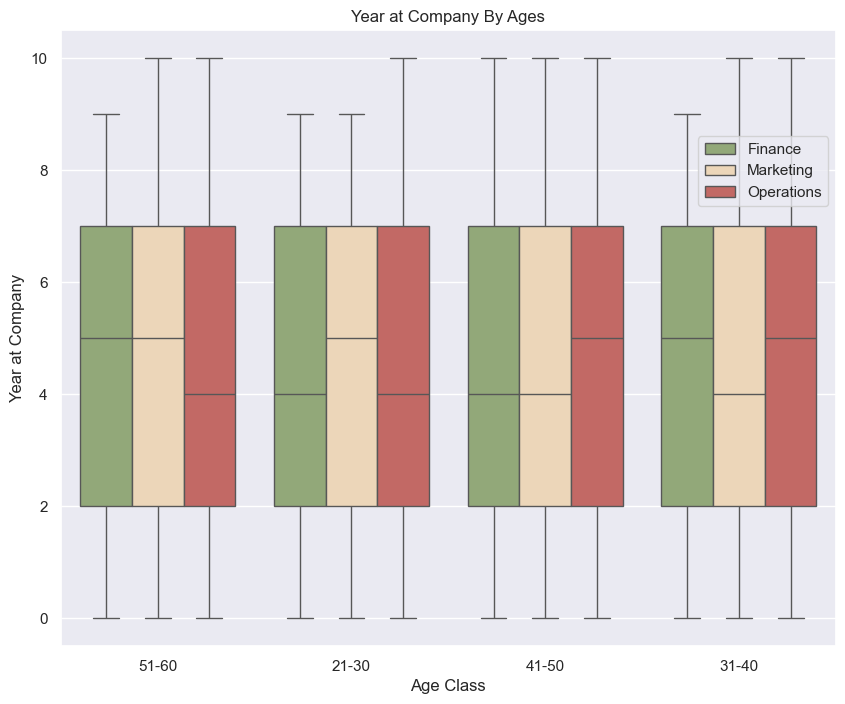

In [173]:
sns.set_theme()
plt.figure(figsize=(10,8))


ax=sns.boxplot(x=dataset['Age_class'],y=dataset['Years_At_Company'],hue=dataset['Department'][dataset['Department'].isin(['Finance', 'Marketing', 'Operations'])],palette=job_palette)
ax.legend(loc='upper right',bbox_to_anchor=(1,.84))

plt.xlabel('Age Class')
plt.ylabel('Year at Company')
plt.title('Year at Company By Ages')

plt.show()

## **The reason for the *decrease in hiring* at that company last year was that the company still has older employees who have not resigned yet.**

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Why that Company still has Older employees who have not resigned yet ?

In [217]:
classAge_Peforcemance=dataset.groupby(['Age_class','Department','Resigned']).agg(
        Frequency=('Age_class','count'),
        AvgPerformance=('Performance_Score','mean')
).reset_index().sort_values(by='AvgPerformance',ascending=False)
classAge_Peforcemance['AvgPerformance']=classAge_Peforcemance['AvgPerformance'].round(2)

classAge_Peforcemance=classAge_Peforcemance[ classAge_Peforcemance['Resigned'] == False ]
classAge_Peforcemance


,Age_class,Department,Resigned,Frequency,AvgPerformance
14,21-30,Operations,False,2320,3.07
56,51-60,Engineering,False,2537,3.04
38,41-50,Engineering,False,2587,3.04
0,21-30,Customer Support,False,2335,3.03
62,51-60,IT,False,2589,3.03
48,41-50,Marketing,False,2624,3.02
20,31-40,Engineering,False,2532,3.02
30,31-40,Marketing,False,2529,3.02
46,41-50,Legal,False,2533,3.02
60,51-60,HR,False,2507,3.01


c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset =

Text(0.5, 1.0, 'Frequency by Age Class')

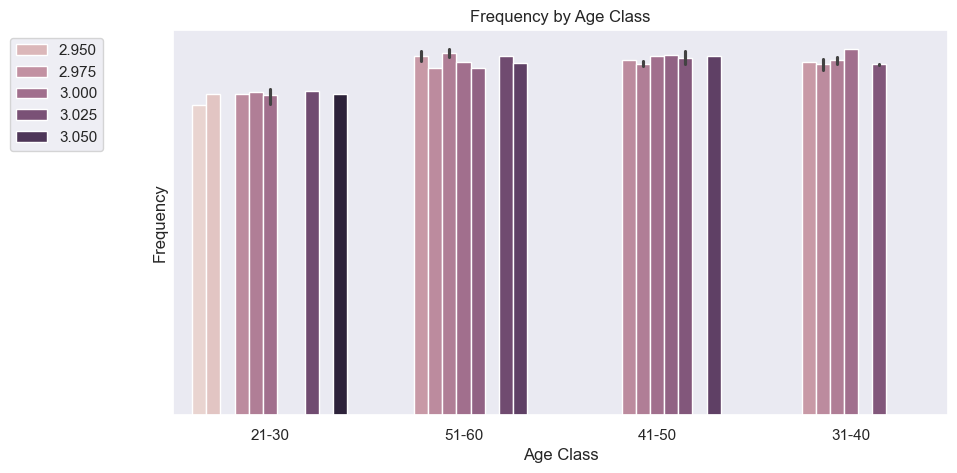

In [212]:
#colors=['#f7eaa8','#d4dfa1','#b1d59b','#8eca94','#6bbf8e','#48b587']
plt.figure(figsize=(10,5))
ax=sns.barplot(x=classAge_Peforcemance['Age_class'],y=classAge_Peforcemance['Frequency'],hue=classAge_Peforcemance['AvgPerformance'])
ax.legend(loc='upper right',bbox_to_anchor=(-0.08,1))
plt.yticks([])
plt.ylabel('Frequency')
plt.xlabel('Age Class')
plt.title('Frequency by Age Class')

C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_10208\2719513180.py:2: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  ax=sns.barplot(x=classAge_Peforcemance['Age_class'],y=classAge_Peforcemance['AvgPerformance']
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\

Text(0.5, 1.0, 'Avrage Performance by Age Class')

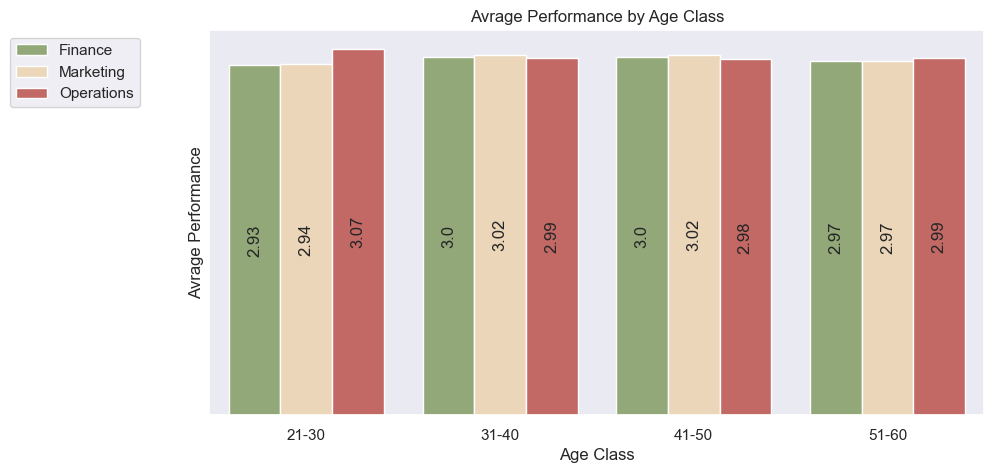

In [211]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=classAge_Peforcemance['Age_class'],y=classAge_Peforcemance['AvgPerformance']
               ,hue=classAge_Peforcemance['Department'][classAge_Peforcemance['Department'].isin(['Finance', 'Marketing', 'Operations'])],
               palette=job_palette)
ax.legend(loc='upper right',bbox_to_anchor=(-0.08,1))
for container in ax.containers:
    label=[f"{val}" for val in  container.datavalues]
    ax.bar_label(container,labels=label,label_type='center',rotation=90)

plt.yticks([])
plt.ylabel('Avrage Performance')
plt.xlabel('Age Class')
plt.title('Avrage Performance by Age Class With Department')

## **The reason the company still has older employees who have not resigned yet is that they perform well in their jobs.**

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# is it important to have a good level of eduaction to do a good job or to have a good salary ? 

## With Age Class

In [219]:
Peforcemance_by_classlvl=dataset.groupby(['Age_class','Education_Level','Resigned']).agg(
        Frequency=('Age_class','count'),
        AvgPerformance=('Performance_Score','mean')
).reset_index().sort_values(by='AvgPerformance',ascending=False)
Peforcemance_by_classlvl['AvgPerformance']=Peforcemance_by_classlvl['AvgPerformance'].round(2)

Peforcemance_by_classlvl=Peforcemance_by_classlvl[ Peforcemance_by_classlvl['Resigned'] == False ]
Peforcemance_by_classlvl

,Age_class,Education_Level,Resigned,Frequency,AvgPerformance
20,41-50,Master,False,3510,3.04
12,31-40,Master,False,3355,3.04
14,31-40,PhD,False,1095,3.04
26,51-60,High School,False,6967,3.03
28,51-60,Master,False,3406,3.02
18,41-50,High School,False,6895,3.01
22,41-50,PhD,False,1169,3.00
4,21-30,Master,False,3146,3.00
2,21-30,High School,False,6220,3.00
0,21-30,Bachelor,False,10373,2.99


C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_10208\2287344228.py:2: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax=sns.barplot(x=Peforcemance_by_classlvl['Age_class'],y=Peforcemance_by_classlvl['AvgPerformance']
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\P

Text(0.5, 1.0, 'Avrage Performance by Age Class With Education Level')

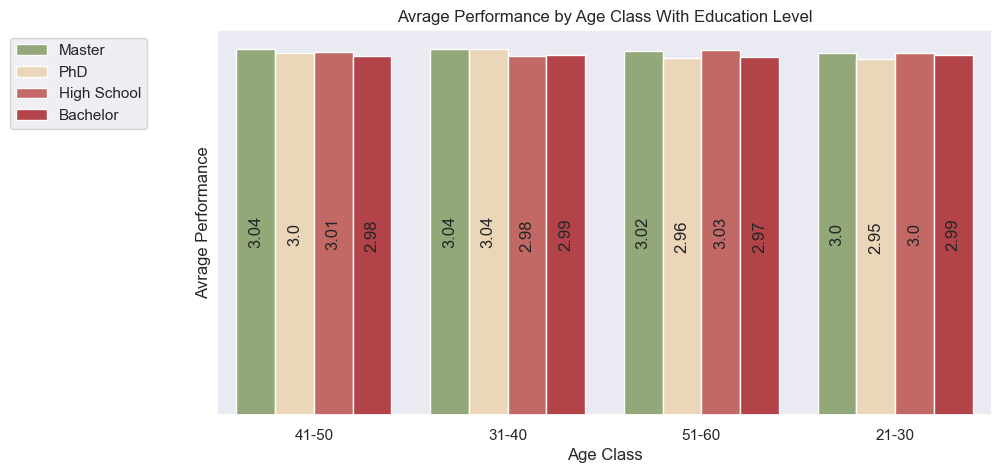

In [220]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=Peforcemance_by_classlvl['Age_class'],y=Peforcemance_by_classlvl['AvgPerformance']
               ,hue=Peforcemance_by_classlvl['Education_Level'],
               palette=job_palette)
ax.legend(loc='upper right',bbox_to_anchor=(-0.08,1))
for container in ax.containers:
    label=[f"{val}" for val in  container.datavalues]
    ax.bar_label(container,labels=label,label_type='center',rotation=90)

plt.yticks([])
plt.ylabel('Avrage Performance')
plt.xlabel('Age Class')
plt.title('Avrage Performance by Age Class With Education Level')

In [224]:
salary_by_classlvl=dataset.groupby(['Age_class','Education_Level','Resigned']).agg(
        Frequency=('Age_class','count'),
        AvgSalary=('Monthly_Salary','mean')
).reset_index().sort_values(by='AvgSalary',ascending=False)
salary_by_classlvl['AvgSalary']=salary_by_classlvl['AvgSalary'].round(2)

salary_by_classlvl=salary_by_classlvl[ salary_by_classlvl['Resigned'] == False ]
salary_by_classlvl

,Age_class,Education_Level,Resigned,Frequency,AvgSalary
14,31-40,PhD,False,1095,6463.33
30,51-60,PhD,False,1231,6443.58
12,31-40,Master,False,3355,6434.10
22,41-50,PhD,False,1169,6433.28
20,41-50,Master,False,3510,6430.67
28,51-60,Master,False,3406,6415.43
18,41-50,High School,False,6895,6411.96
24,51-60,Bachelor,False,11492,6410.87
2,21-30,High School,False,6220,6409.16
26,51-60,High School,False,6967,6404.92


C:\Users\Topland.ma\AppData\Local\Temp\ipykernel_10208\2963079257.py:2: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax=sns.barplot(x=salary_by_classlvl['Age_class'],y=salary_by_classlvl['AvgSalary']
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\L

Text(0.5, 1.0, 'Avrage Salary by Age Class With Education Level')

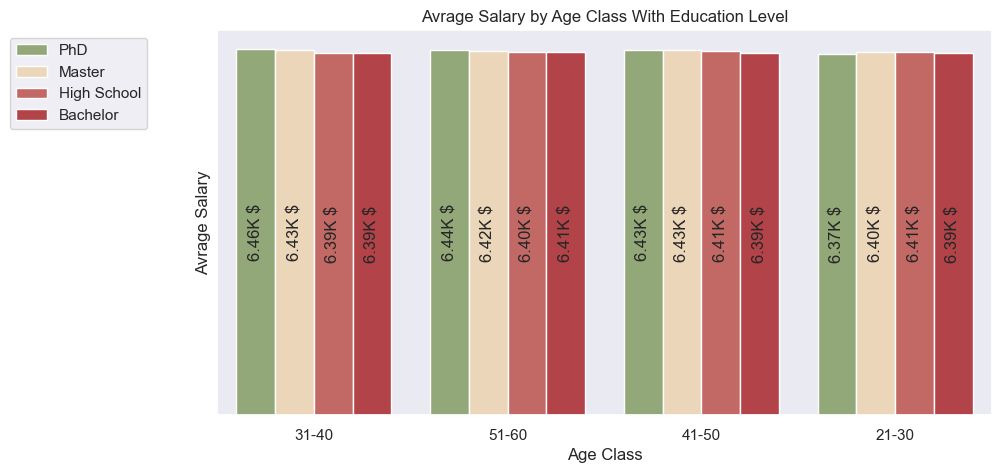

In [226]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=salary_by_classlvl['Age_class'],y=salary_by_classlvl['AvgSalary']
               ,hue=salary_by_classlvl['Education_Level'],
               palette=job_palette)
ax.legend(loc='upper right',bbox_to_anchor=(-0.08,1))
for container in ax.containers:
    label=[f"{val :.2f}K $" for val in  container.datavalues/1000]
    ax.bar_label(container,labels=label,label_type='center',rotation=90)

plt.yticks([])
plt.ylabel('Avrage Salary')
plt.xlabel('Age Class')
plt.title('Avrage Salary by Age Class With Education Level')

## It's important to have a good level of education as it impacts your performance. Even as you age, having a strong educational background can help ensure that age does not negatively affect your performance.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------Model-------------------------------------------------------------------

In [291]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2
import tensorflow as tf

In [229]:
dataset.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Age_class
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False,51-60
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False,21-30
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False,51-60
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False,41-50
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False,31-40


<Axes: >

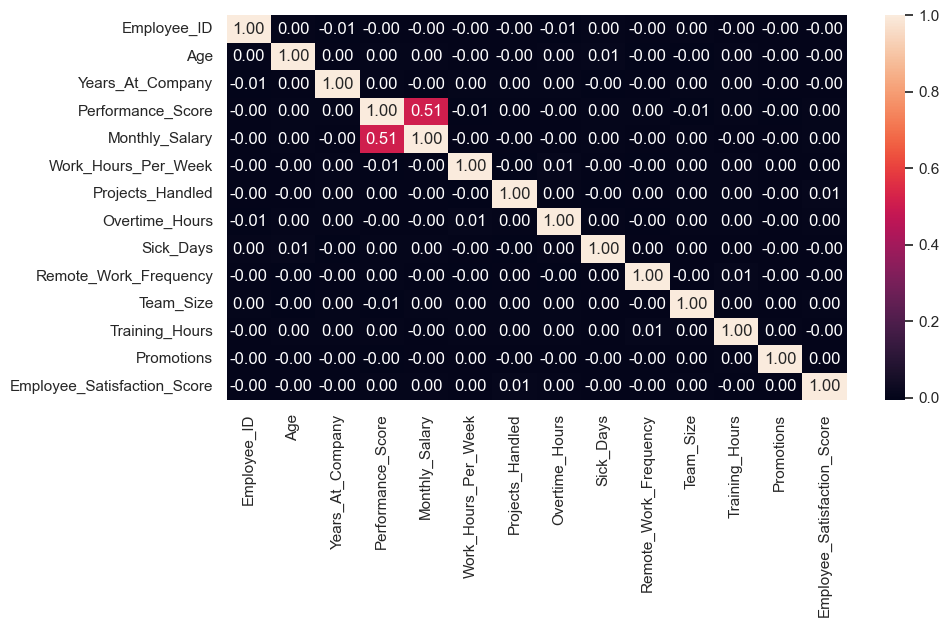

In [235]:
corr_data=dataset.select_dtypes('number').corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_data,annot=True,fmt=".2f")

In [240]:
train_data= dataset.copy()
le= LabelEncoder()

train_data['Department']= le.fit_transform(train_data['Department'])
train_data['Gender']= le.fit_transform(train_data['Gender'])

train_data['Job_Title']= le.fit_transform(train_data['Job_Title'])
train_data['Education_Level']= le.fit_transform(train_data['Education_Level'])

train_data['Age_class']= le.fit_transform(train_data['Age_class'])



train_data.head()


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Age_class
0,1,4,1,55,5,2022-01-19 08:03:05.556036,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63,False,3
1,2,2,1,29,2,2024-04-18 08:03:05.556036,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72,False,0
2,3,2,1,55,5,2015-10-26 08:03:05.556036,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17,False,3
3,4,0,0,48,0,2016-10-22 08:03:05.556036,7,0,2,4800.0,52,10,28,12,100,10,0,1,1.86,False,2
4,5,1,0,36,0,2021-07-23 08:03:05.556036,3,0,2,4800.0,38,11,29,13,100,15,9,1,1.25,False,1


In [241]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Employee_ID                  100000 non-null  int64         
 1   Department                   100000 non-null  int32         
 2   Gender                       100000 non-null  int32         
 3   Age                          100000 non-null  int64         
 4   Job_Title                    100000 non-null  int32         
 5   Hire_Date                    100000 non-null  datetime64[ns]
 6   Years_At_Company             100000 non-null  int64         
 7   Education_Level              100000 non-null  int32         
 8   Performance_Score            100000 non-null  int64         
 9   Monthly_Salary               100000 non-null  float64       
 10  Work_Hours_Per_Week          100000 non-null  int64         
 11  Projects_Handled           

In [258]:
train_corr= train_data.select_dtypes('number').corr()


In [263]:
train_corr=train_corr[train_corr>0.0015]

Text(0.5, 1.0, 'correlation between Performance With other item')

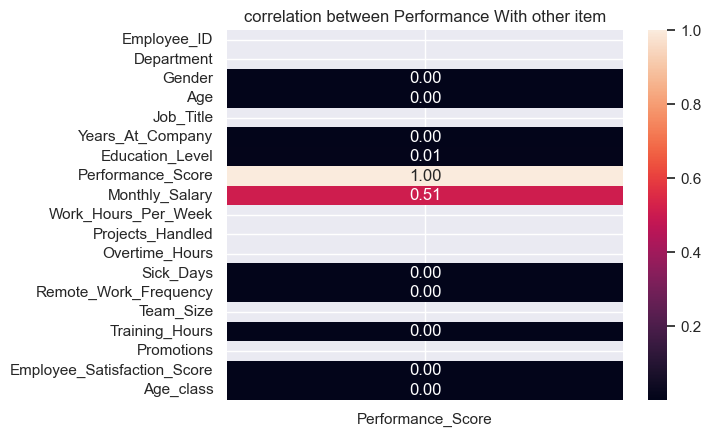

In [387]:
sns.heatmap(train_corr[['Performance_Score']],annot=True,fmt=".2f")
plt.title("correlation between Performance With other item")

In [265]:
train_corr['Performance_Score']

Employee_ID                         NaN
Department                          NaN
Gender                         0.003328
Age                            0.001598
Job_Title                           NaN
Years_At_Company               0.001598
Education_Level                0.006658
Performance_Score              1.000000
Monthly_Salary                 0.510035
Work_Hours_Per_Week                 NaN
Projects_Handled                    NaN
Overtime_Hours                      NaN
Sick_Days                      0.002994
Remote_Work_Frequency          0.001733
Team_Size                           NaN
Training_Hours                 0.002358
Promotions                          NaN
Employee_Satisfaction_Score    0.001696
Age_class                      0.001504
Name: Performance_Score, dtype: float64

In [266]:
useful_columns=['Years_At_Company','Education_Level','Monthly_Salary','Work_Hours_Per_Week','Employee_Satisfaction_Score','Sick_Days']
train_data_v2= dataset.copy()

train_data_v2['Education_Level']=le.fit_transform(train_data_v2['Education_Level'])

In [267]:
train_data_v2[useful_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Years_At_Company             100000 non-null  int64  
 1   Education_Level              100000 non-null  int32  
 2   Monthly_Salary               100000 non-null  float64
 3   Work_Hours_Per_Week          100000 non-null  int64  
 4   Employee_Satisfaction_Score  100000 non-null  float64
 5   Sick_Days                    100000 non-null  int64  
dtypes: float64(2), int32(1), int64(3)
memory usage: 4.2 MB


In [325]:
useful_columns=['Years_At_Company','Education_Level','Monthly_Salary','Work_Hours_Per_Week','Employee_Satisfaction_Score','Sick_Days']
train=train_data_v2[useful_columns]
target=train_data_v2['Monthly_Salary']

print(f"train size : {train.shape}")
print(f"target size : {target.shape}")

train size : (100000, 6)
target size : (100000,)


## Scale and Split dataset

In [331]:
x_train,x_test,y_train,y_test=train_test_split(train,target,test_size=0.1)
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)

x_test= scaler.fit_transform(x_test)


# 1 - Linear Regression Model | r2 score = 1

In [332]:
model_LR=LinearRegression()
model_LR.fit(x_train,y_train)

model_LR.score(x_train,y_train)

1.0

In [334]:
#x_train and y_train
y_predict_train= model_LR.predict(x_train)
r2_score(y_train,y_predict_train)

1.0

In [335]:
#x_test and y_test
y_predict_test= model_LR.predict(x_test)
r2_score(y_test,y_predict_test)

0.9999750432873853

In [336]:
model_LR.score(x_train,y_train)

1.0

## 2 -  Random Forest Regression Model | r2 score = 1

In [337]:
model_RF= RandomForestRegressor()
model_RF.fit(x_train,y_train)

RandomForestRegressor()

In [338]:
y_predict_train= model_RF.predict(x_train)
r2_train=r2_score(y_train,y_predict_train)

y_predict_test= model_RF.predict(x_test)
r2_test=r2_score(y_test,y_predict_test)

print(f"r2 score for train dataset : {r2_train}")
print(f"r2 score for test dataset : {r2_test}")

r2 score for train dataset : 1.0
r2 score for test dataset : 1.0


## 3 - Neural Network Model | r2 score = 0.99

In [339]:
model_NN= Sequential([
    Dense(128,input_shape=(x_train.shape[1],),activation='relu',kernel_regularizer=l2(1e-3)),

    Dense(64, activation='relu',kernel_regularizer=l2(1e-4) ),
    Dense(64, activation='relu',kernel_regularizer=l2(1e-4) ),
    
    Dense(32, activation='relu',kernel_regularizer=l2(1e-4) ),
    Dense(32, activation='relu',kernel_regularizer=l2(1e-4) ),

    Dense(12, activation='relu',kernel_regularizer=l2(1e-4) ),
    Dense(12, activation='relu',kernel_regularizer=l2(1e-4) ),

    Dense(1, activation='linear')
   
])



In [340]:
model_NN.compile(
    optimizer=tf.optimizers.Adam(1e-4),
    loss='mean_squared_error',
    metrics=['mae']
)

In [341]:
history=model_NN.fit(x_train,y_train,validation_split=0.15,epochs=30)

Epoch 1/30
2391/2391 [==============================] - 12s 4ms/step - loss: 9013999.0000 - mae: 1870.2960 - val_loss: 552166.8750 - val_mae: 591.9902
Epoch 2/30
2391/2391 [==============================] - 8s 3ms/step - loss: 359288.6250 - mae: 474.5884 - val_loss: 203959.5000 - val_mae: 360.9388
Epoch 3/30
2391/2391 [==============================] - 8s 3ms/step - loss: 102878.9297 - mae: 248.1930 - val_loss: 39861.8789 - val_mae: 155.3629
Epoch 4/30
2391/2391 [==============================] - 8s 3ms/step - loss: 17406.7070 - mae: 96.9728 - val_loss: 6146.6748 - val_mae: 55.8392
Epoch 5/30
2391/2391 [==============================] - 8s 3ms/step - loss: 2572.7148 - mae: 34.7153 - val_loss: 1024.2043 - val_mae: 21.7091
Epoch 6/30
2391/2391 [==============================] - 9s 4ms/step - loss: 569.0584 - mae: 17.0379 - val_loss: 346.4955 - val_mae: 13.6181
Epoch 7/30
2391/2391 [==============================] - 9s 4ms/step - loss: 219.1783 - mae: 10.8574 - val_loss: 145.1839 - val_ma

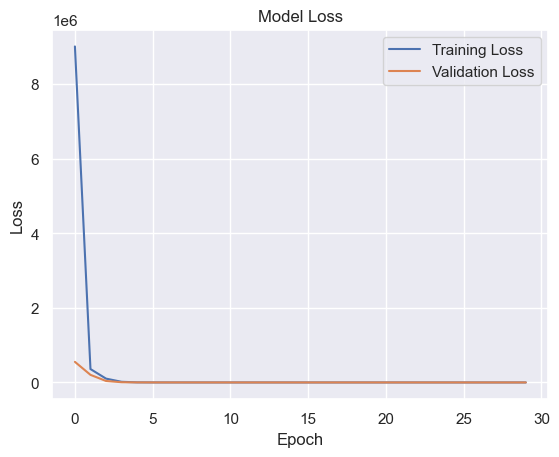

In [349]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

2813/2813 [==============================] - 6s 2ms/step


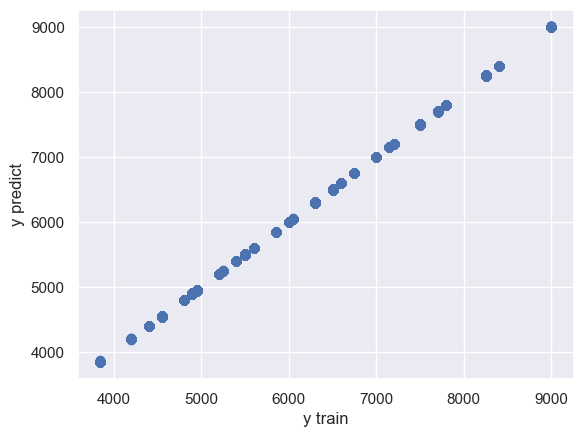

In [350]:
y_hat= model_NN.predict(x_train)
plt.scatter(y_train,y_hat)
plt.xlabel('y train')
plt.ylabel('y predict')
plt.show()

In [344]:
r2_score(y_train,y_hat)

0.9999970564363261

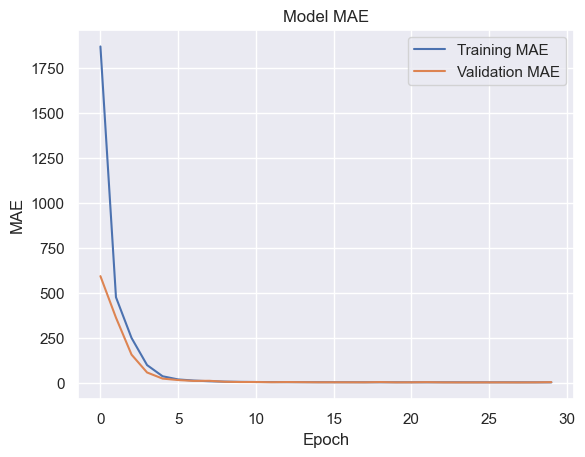

In [348]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [353]:
y_hat= model_NN.predict(x_test)
r2_score(y_test,y_hat)

313/313 [==============================] - 1s 2ms/step


0.9999573634725295

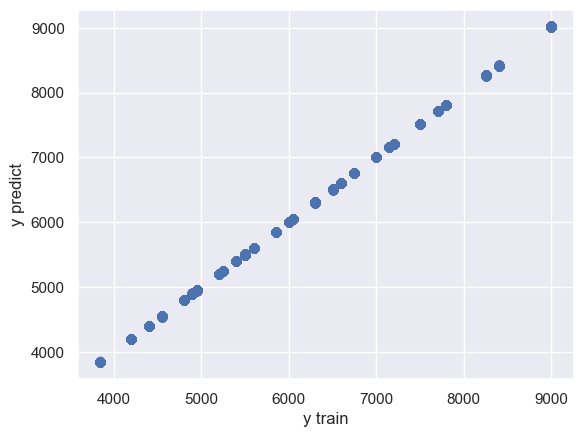

In [354]:
plt.scatter(y_test,y_hat)
plt.xlabel('y train')
plt.ylabel('y predict')
plt.show()


In [351]:
useful_columns

['Years_At_Company',
 'Education_Level',
 'Monthly_Salary',
 'Work_Hours_Per_Week',
 'Employee_Satisfaction_Score',
 'Sick_Days']

In [381]:
def get_performance(Years_At_Company: float, Education_Level: str, Monthly_Salary: float,
                    Work_Hours_Per_Week: float, Employee_Satisfaction_Score: float,
                    Sick_Days: float, le=le,scaler=scaler) -> np.ndarray:

    try:
        encoded_education_level = le.transform([Education_Level])[0]

        input_features = np.array([[Years_At_Company, encoded_education_level, Monthly_Salary,
                                     Work_Hours_Per_Week, Employee_Satisfaction_Score, Sick_Days]])

        input_scaled = scaler.transform(input_features)

        # Predict the performance
        y_hat = model_NN.predict(input_scaled)
        
        return y_hat

    except ValueError as e:
        print(f"Error in transforming Education Level: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [359]:
dataset[useful_columns].loc[100]

Years_At_Company                         6
Education_Level                High School
Monthly_Salary                      8400.0
Work_Hours_Per_Week                     35
Employee_Satisfaction_Score           3.42
Sick_Days                               14
Name: 100, dtype: object

In [386]:
get_performance(6,'High School',8400.0,35,3.42,14)

1/1 [==============================] - 0s 25ms/step


c:\Users\Topland.ma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[8414.471]], dtype=float32)

In [382]:
dataset['Monthly_Salary'].loc[100]

8400.0